In [1]:
"""
Created on Sat Jun 27 12:28:00 2020

@author: Stephanie DeMaria

"""
import pandas as pd
import numpy as np
import sklearn
import shap
import matplotlib.pyplot as plt

In [2]:
shap.initjs() #Load the plotting capability for the force plots from the shap package

ibmNewData = pd.read_csv('IBM-HR-Employee-Attrition2.csv') #Load in the version of the IBM dataset with new variables
X_display = pd.DataFrame(ibmNewData)

y = pd.DataFrame(ibmNewData['Attrition']) #Create another dataframe for the attrition variable
y = y.to_numpy() #Convert the dataframe to a numpy array
print(y)

X_display = X_display.drop(columns = 'Attrition') #Drop the Attrition variable


[['Yes']
 ['No']
 ['Yes']
 ...
 ['No']
 ['No']
 ['No']]


In [3]:
ibmData = pd.read_csv('IBM-HR-Employee-Attrition2-Numeric.csv') #Load in the version with dummy variables representing categorical variables
X = pd.DataFrame(ibmData) #Convert the dataset to a pandas dataframe
X = X.drop(columns = ['Attrition', 'Over18']) #Remove the attrition column
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,GenderMaritalStatus,GenderJobRole,GenderJobSatisfaction,GenderEducationField,GenderTrainingTimeLastYear,GenderHourlyRateLevel,HourlyRateLevel,MaritalStatusHourlyRateLevel
0,41,1,1102,1,1,2,1,1,1,2,...,0,5,1,0,7,1,8,15,7,6
1,49,2,279,2,8,1,1,1,2,3,...,1,7,2,5,2,0,5,6,4,10
2,37,1,1373,2,2,2,6,1,4,4,...,0,0,0,6,5,3,5,14,7,6
3,33,2,1392,2,3,4,1,1,5,4,...,3,0,3,4,4,1,4,4,3,9
4,27,1,591,2,2,1,2,1,7,1,...,2,2,2,6,2,4,5,2,2,8


In [14]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y.ravel(), test_size=0.2, random_state=7)
knn = sklearn.neighbors.KNeighborsClassifier()
model = knn.fit(X_train, y_train)

In [15]:
probabilities = knn.predict_proba(X_valid)
probList = []
for i in range(len(X_valid)):
    #print(probabilities[i][1])
    probList.append(probabilities[i][1])
#print(probList)
ibmProbData = pd.DataFrame(probList)
#ibmProbData.to_csv('ibmKernalProbs.csv')
#ibmProbData.head()
model.score(X_valid, y_valid) #Accuracy Score for the model

0.8435374149659864

In [16]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [17]:
shap_values = explainer.shap_values(X_valid.iloc[0:1000,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values, X_valid.iloc[0:1000,:])
#Sample order by similarity selection: Stacked SHAP explanations clustered by explanation similarity. 
#Each position on the x-axis is an instance of the data. Red SHAP values increase the prediction, blue values decrease it.

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

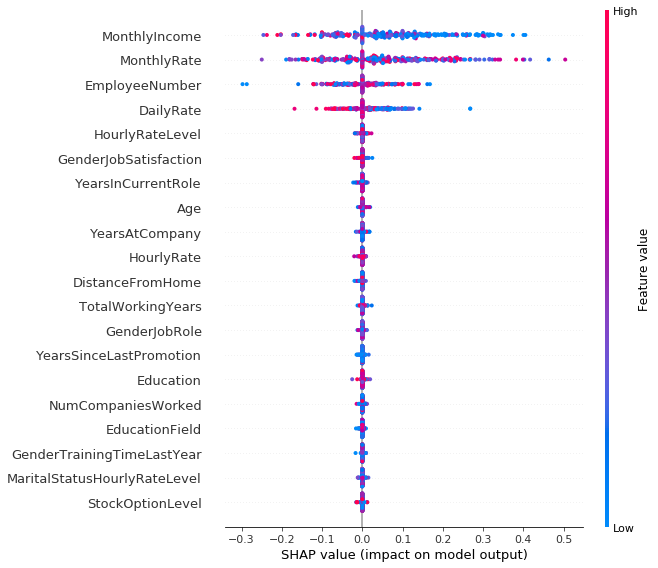

In [18]:
#Produces a shap summary plot: A summary plot is an even better way to see the relative impact of all features over the entire dataset. 
#The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. 
#The color represents the feature value (red high, blue low).
shap.summary_plot(shap_values, X_valid.iloc[0:1000,:])

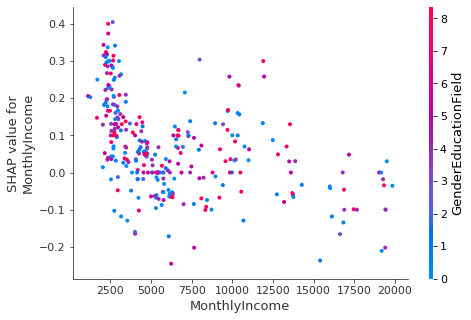

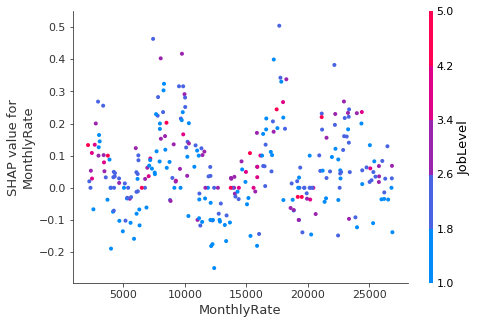

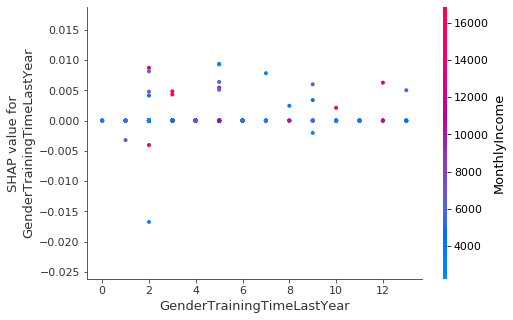

In [19]:
shap.dependence_plot("MonthlyIncome", shap_values, X_valid.iloc[0:1000,:]) 
shap.dependence_plot("MonthlyRate", shap_values, X_valid.iloc[0:1000,:])
shap.dependence_plot("GenderTrainingTimeLastYear", shap_values, X_valid.iloc[0:1000,:])
#The dependence plot shows that monthly income has more impact on Attrition for employees with a high GenderEducation value. 